## Customers Segmentation based on their credit card usage behaviour - using KMeans

The problem described in the "credit_card_data" database requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load the data

In [2]:
data = pd.read_csv("credit_card_data.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

* CUSTID : Identification of Credit Card holder 
* BALANCE : Balance amount left in their account to make purchases 
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
* CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Number of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRC_FULL_PAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Most of the features have mean way greater than their median: this is a sign of some skewness in the dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data.duplicated().sum()

0

### Dealing with Missing Values

"CUST_ID" seems to be a unique id for each customer and hence won't play any role in determining the cluster.

In [8]:
data.drop(['CUST_ID'], axis=1, inplace=True)

As the column "CREDIT_LIMIT" has just 1 missing value, we can simply drop it.

It seems that the distribution of the variable "MINIMUM_PAYMENTS" is skewed (mean= 864 and median= 312), therefore we will simply use the median to replace the Nan values. We won't use the mean because it is heavily influenced by outliers (skewness).

In [9]:
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

### Data exploration

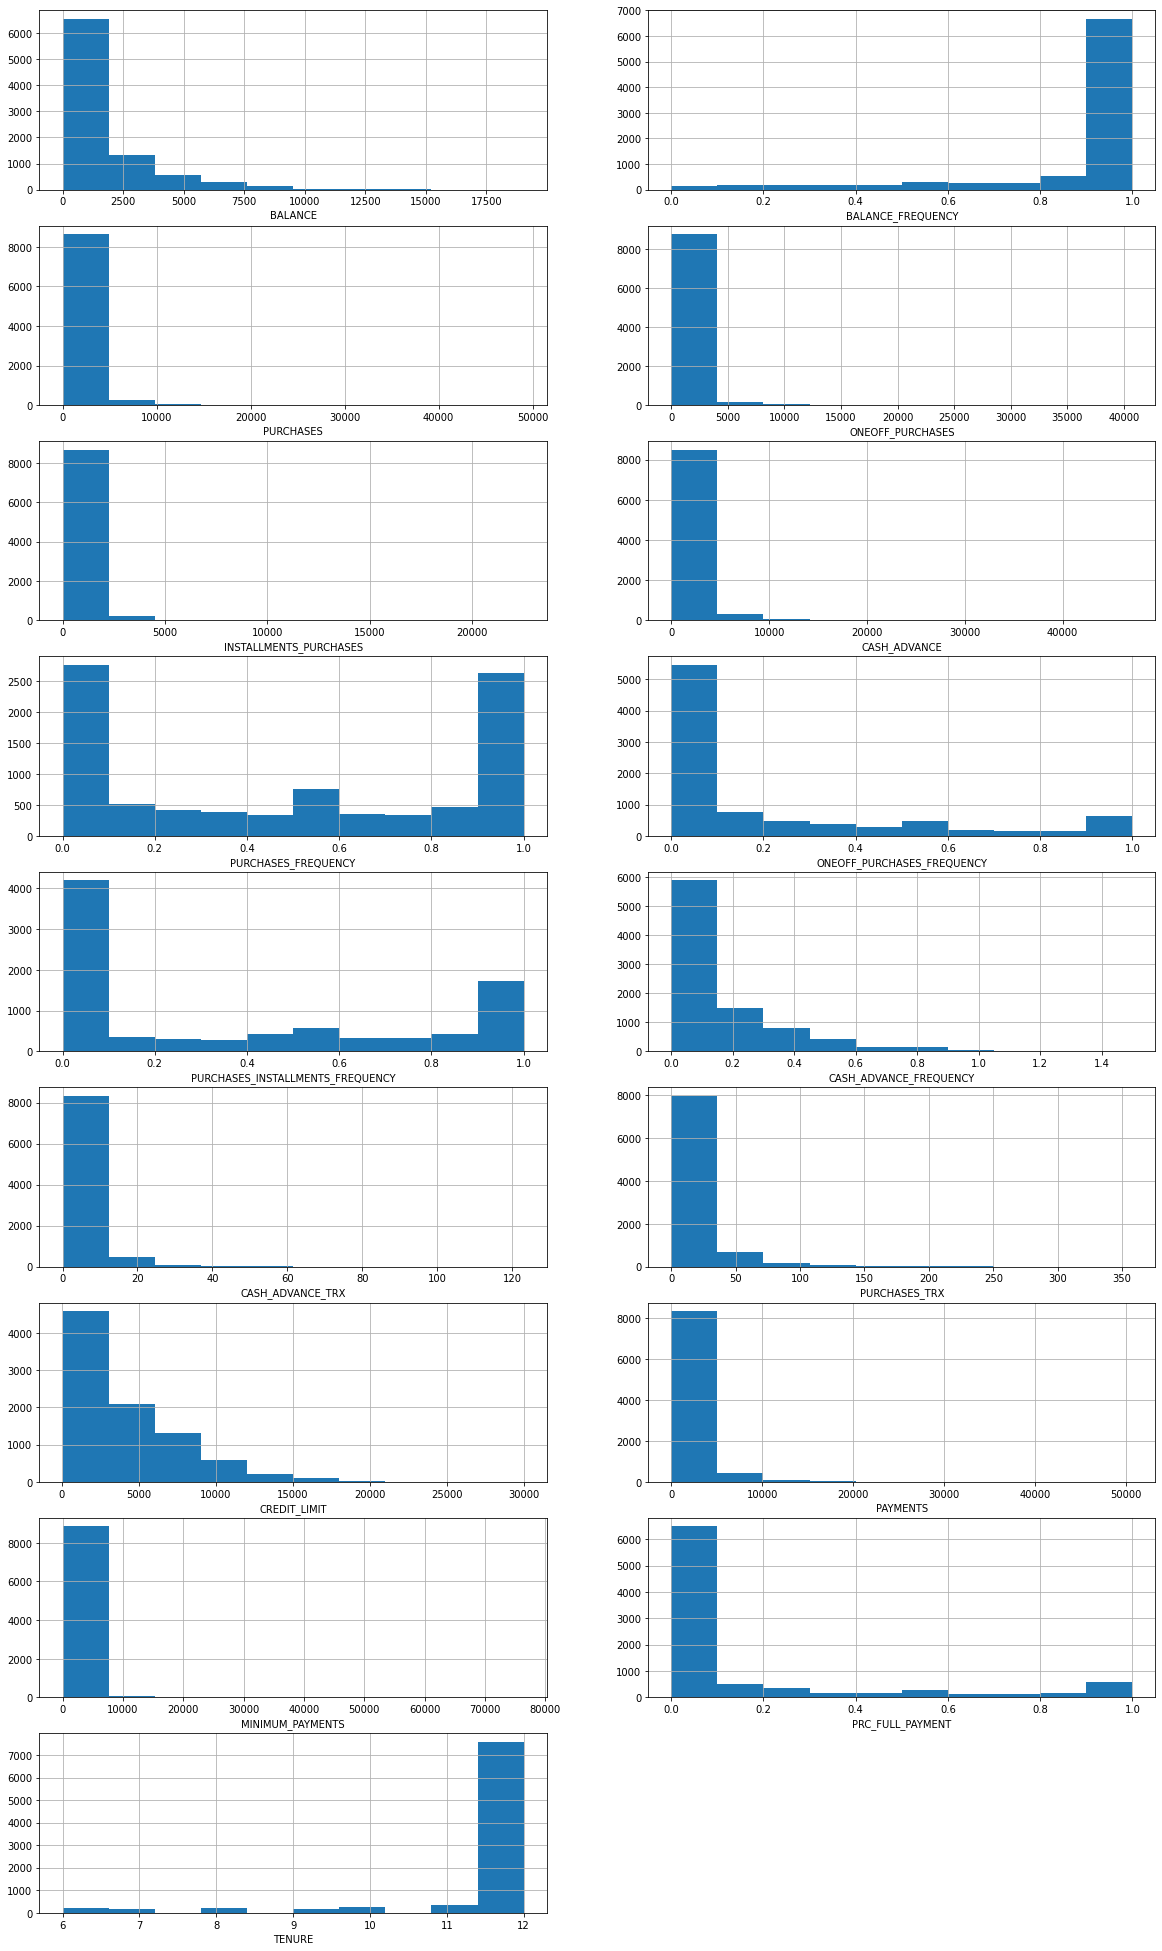

In [10]:
# Histograms

plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    ax = plt.subplot(9, 2, i+1)
    data[col].hist()
    plt.xlabel(col)
plt.show()

There is a lot of skewness. We will handle the skewness as much as possible as it will help the model to form better clusters.

In [11]:
# Applying Log Transform

for col in data.columns:
    data[col] = np.log(1 + data[col])

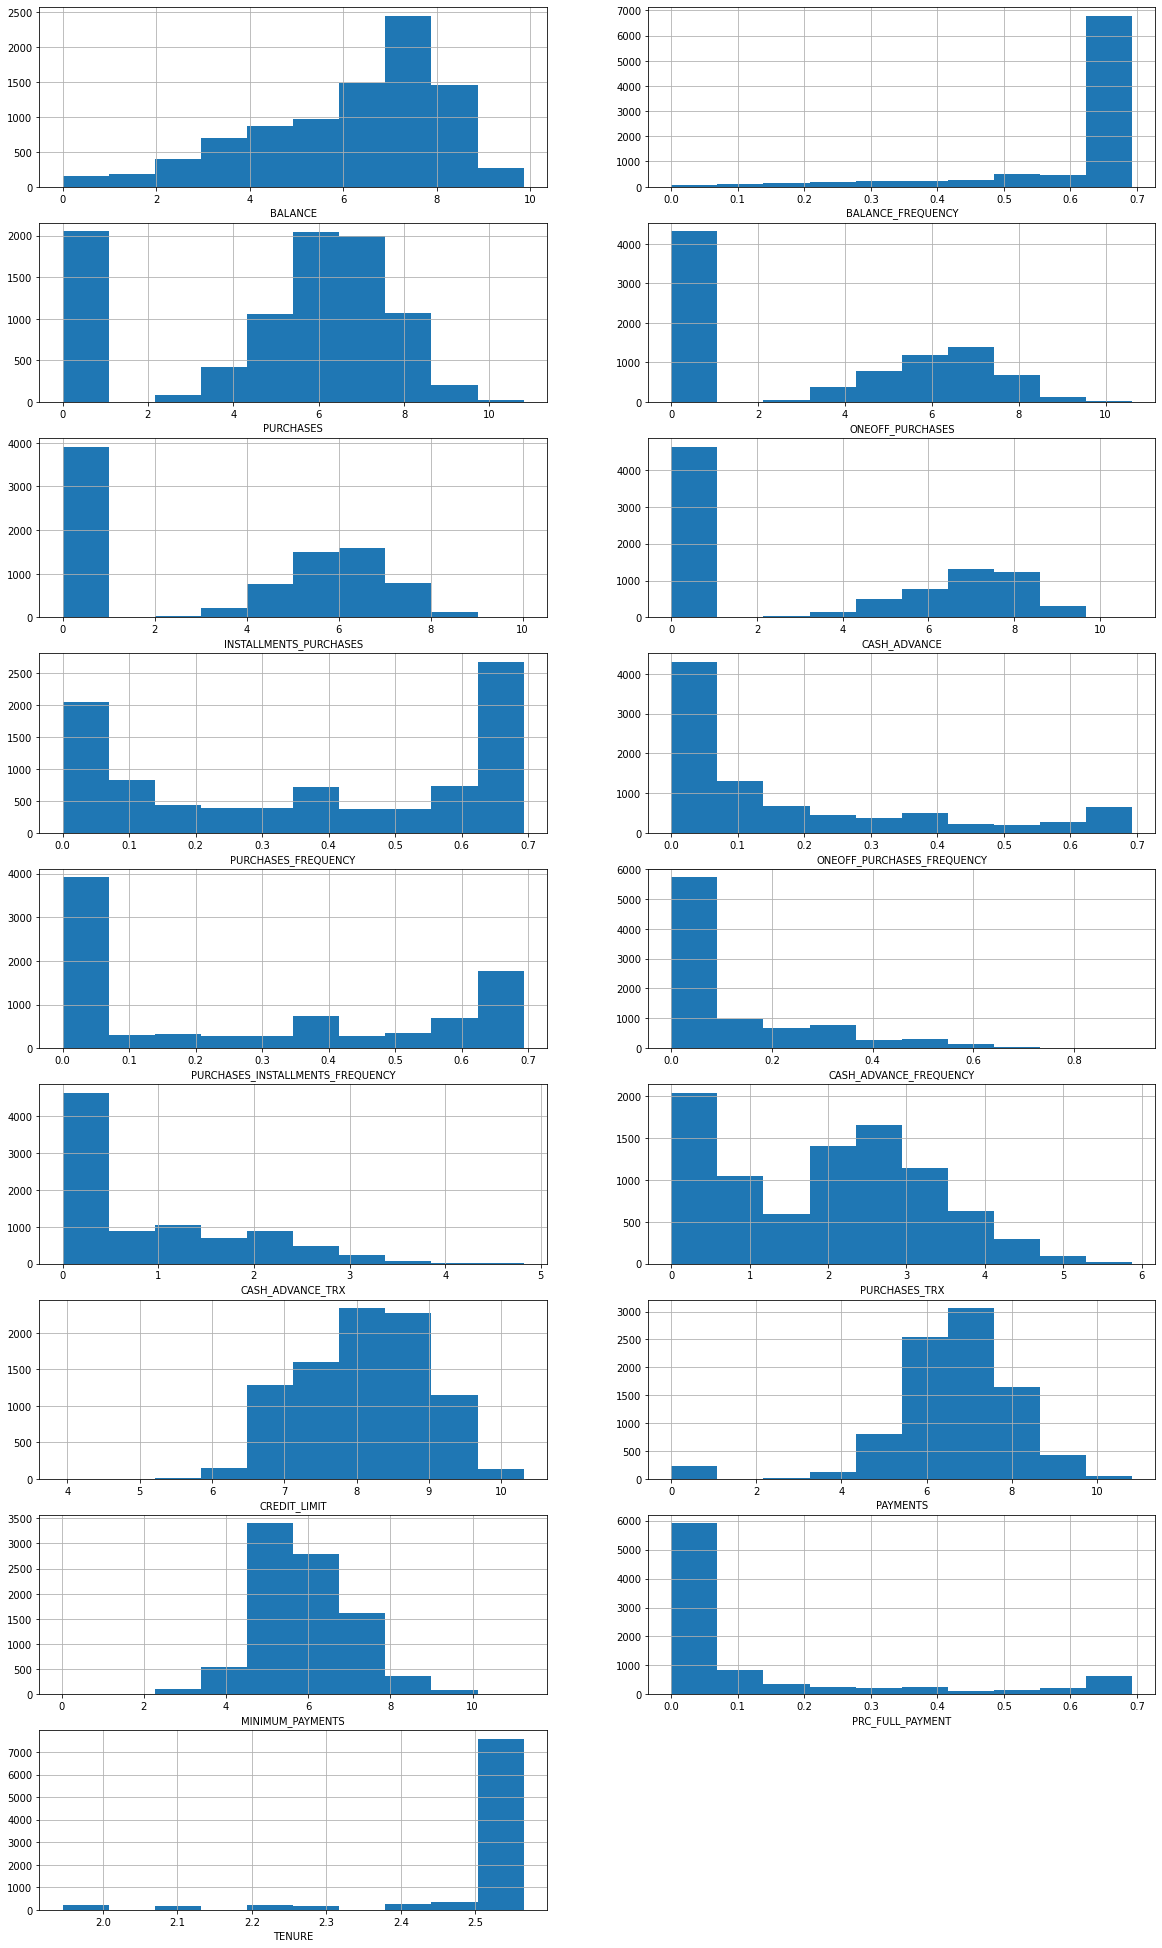

In [12]:
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    ax = plt.subplot(9, 2, i+1)
    data[col].hist()
    plt.xlabel(col)
plt.show()

The results are not normally distributed for sure, but it is better than what we had before.

In [13]:
# Normalizing the variables: Centering and scaling the variables (K-means works well on variables with the same mean and the same variance / standard deviation)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
data_normalized = scaler.transform(data)
scaled_features_data = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

In [14]:
scaled_features_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8949.000000,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8949.000000,8.949000e+03
mean,1.460944e-16,-8.892702e-16,6.510728e-17,-4.446351e-17,1.173122e-16,7.145921e-18,-2.659871e-17,3.811158e-17,0.000000,-3.731759e-17,3.017167e-17,6.351930e-17,3.430042e-16,5.145063e-16,-1.143347e-16,0.000000,2.540772e-15
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056,1.000056e+00
min,-3.061071e+00,-4.174804e+00,-1.680213e+00,-9.871985e-01,-1.087586e+00,-9.306359e-01,-1.302995e+00,-7.325429e-01,-0.958359,-7.242936e-01,-8.100379e-01,-1.379434e+00,-5.079142e+00,-4.163779e+00,-5.042963e+00,-0.556409,-4.406443e+00
25%,-6.454735e-01,1.077188e-01,-4.085542e-01,-9.871985e-01,-1.087586e+00,-9.306359e-01,-1.014336e+00,-7.325429e-01,-0.958359,-7.242936e-01,-8.100379e-01,-8.748534e-01,-8.741168e-01,-4.233803e-01,-6.581546e-01,-0.556409,3.471269e-01
50%,3.039534e-01,4.926028e-01,3.404191e-01,1.413749e-01,3.720783e-01,-9.306359e-01,1.592453e-01,-3.631143e-01,-0.411410,-7.242936e-01,-8.100379e-01,1.343072e-01,-1.075291e-01,8.148696e-02,-1.443413e-01,-0.556409,3.471269e-01
75%,7.283677e-01,4.926028e-01,7.245116e-01,9.723332e-01,9.080179e-01,1.036840e+00,1.043238e+00,4.783760e-01,1.027237,5.561843e-01,7.845456e-01,7.246283e-01,8.355939e-01,5.818495e-01,6.458060e-01,0.074607,3.471269e-01
max,1.834319e+00,4.926028e-01,2.023105e+00,2.282948e+00,2.163164e+00,2.086782e+00,1.196721e+00,2.466616e+00,1.501025,5.122555e+00,3.965755e+00,2.903363e+00,2.701408e+00,2.645391e+00,4.555485e+00,2.719131,3.471269e-01


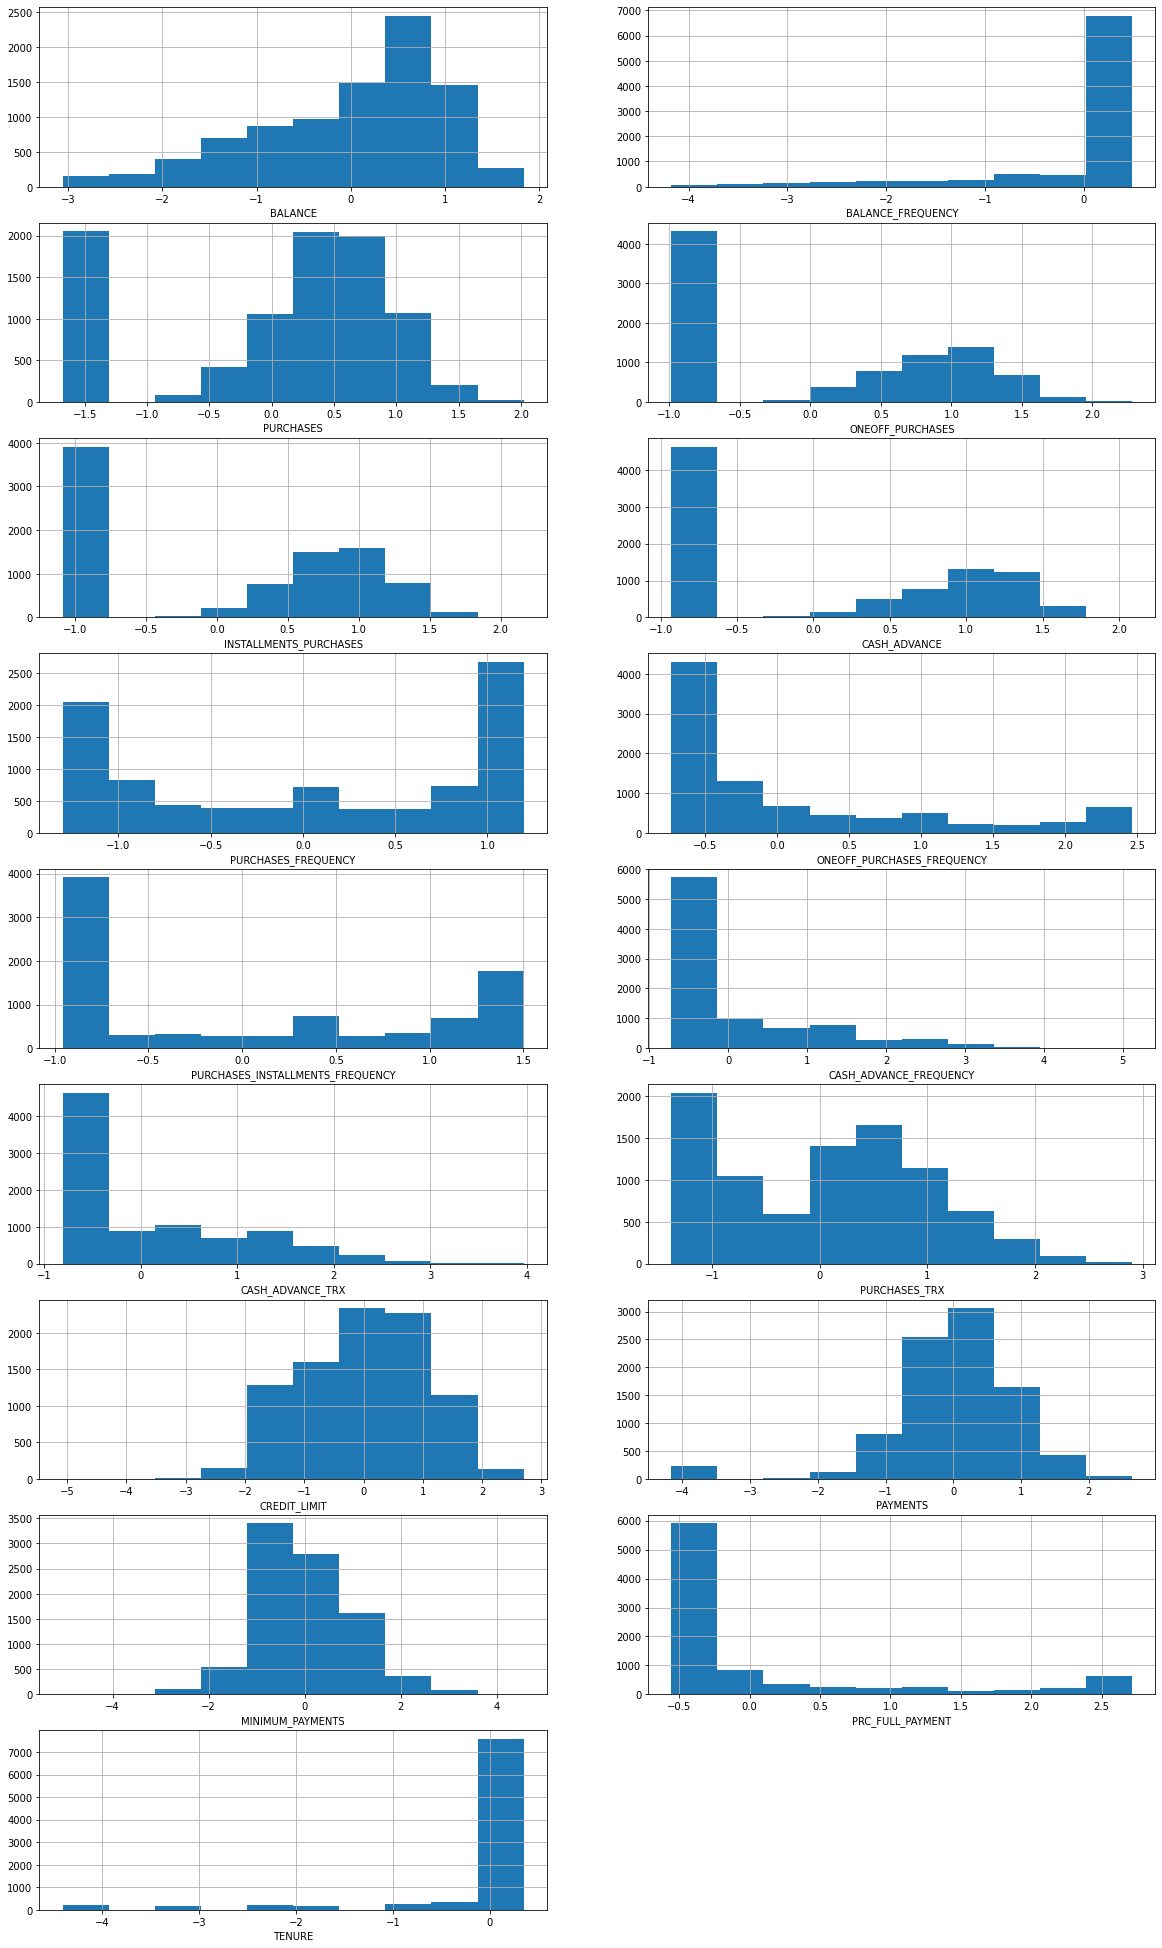

In [15]:
plt.figure(figsize=(20,35))
for i, col in enumerate(scaled_features_data.columns):
    ax = plt.subplot(9, 2, i+1)
    scaled_features_data[col].hist()
    plt.xlabel(col)
plt.show()

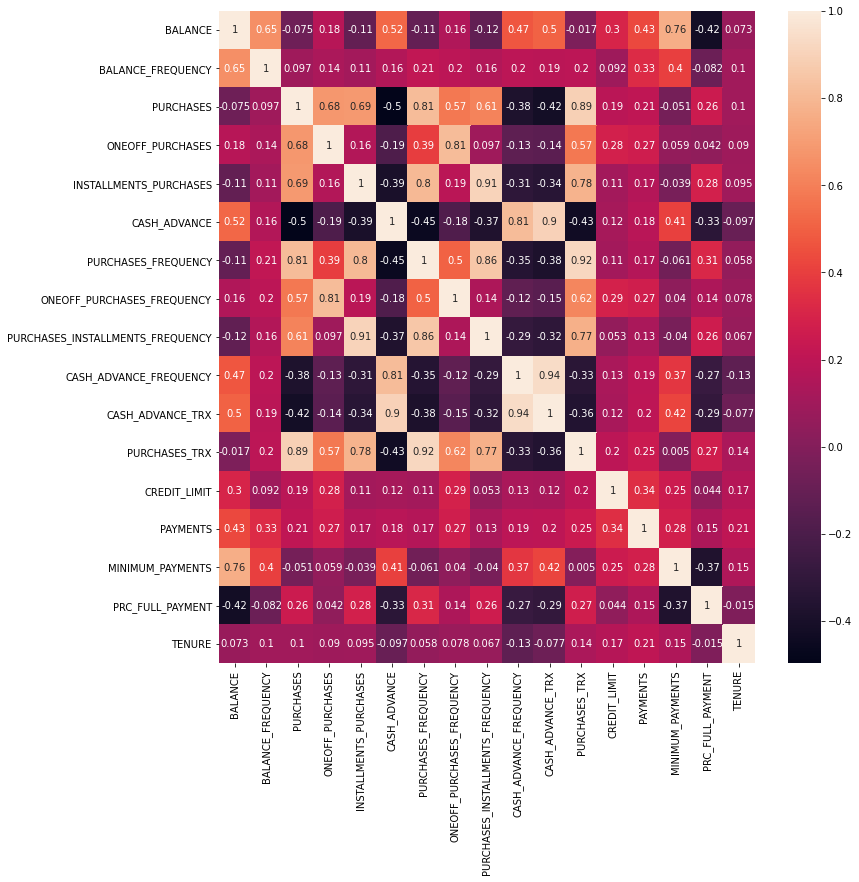

In [16]:
# Correlation

plt.figure(figsize=(12,12))
sns.heatmap(scaled_features_data.corr(), annot=True)
plt.show()

We've got some correlated features there. To handle this, we will go ahead with dimensionality reduction and we will bring our data down to lower dimension.

**We will use PCA for our dimensionality reduction**

First, we need to find the optimal number of components which capture the greatest amount of variance in the data

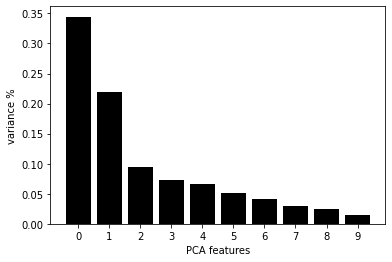

In [17]:
# Finding the optimal number of components

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(scaled_features_data)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

**It looks like the first two components explain the majority of the variance in our data.**

Text(0, 0.5, 'PCA 2')

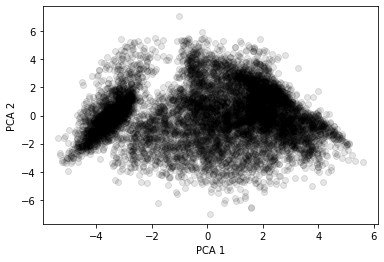

In [18]:
# Scatter plot of the first two components of the PCA model

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [19]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(data)
df_X_principal = pd.DataFrame(X_principal)

### Modeling: Clustering using Kmeans

To choose the best value of K (number of clusters) for our case we will use the Elbow Criterion Method: The idea behind elbow method is to run k-means clustering for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE) (the mean distance between data points and their cluster centroid).

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point.

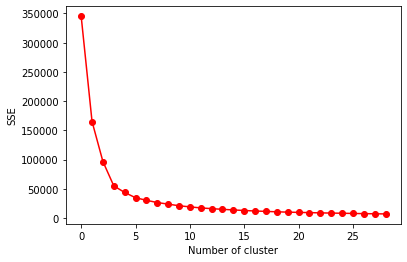

In [33]:
# Choosing the K

from sklearn.cluster import KMeans
sse =[]
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=1000).fit(df_X_principal)
    sse.append( kmeans.inertia_ )# Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot( sse, 'ro-', label="WCSS")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

It seems like the elbow is around 4 or 5. We will use silhouette score to see which one performs better

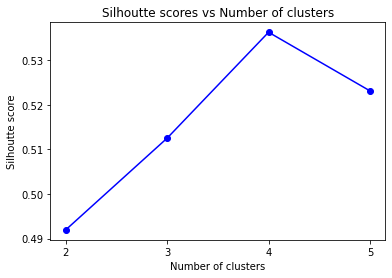

In [37]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=23).fit(df_X_principal) for k in range (1, 10)]
silhoutte_scores = [silhouette_score(df_X_principal, model.labels_) for model in kmeans_models[1:5]]
plt.plot(range(2,6), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4, 5])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

**n=4 seems to have the higher silhouette**

In [38]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=1000, random_state=42)
kmeans.fit(df_X_principal)
labels=kmeans.labels_
print('Silhoutte score of our model is ' + str(silhouette_score(df_X_principal,labels)))

Silhoutte score of our model is 0.5362751258185848


In [39]:
clusters=pd.concat([scaled_features_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-1.205498,-0.149181,-0.113732,-0.987198,0.394362,-0.930636,-0.747076,-0.732543,-0.674357,-0.724294,-0.810038,-0.579693,-1.447095,-0.825080,-0.830453,-0.556409,0.347127,3.0
1,0.948821,0.179354,-1.680213,-0.987198,-1.087586,1.528788,-1.302995,-0.732543,-0.958359,0.699585,0.784546,-1.379434,0.925997,1.065109,0.908196,0.391881,0.347127,0.0
2,0.824885,0.492603,0.600600,1.061910,-1.087586,-0.930636,1.196721,2.466616,-0.958359,-0.724294,-0.810038,0.487735,1.010161,-0.119646,0.450254,-0.556409,0.347127,1.0
3,0.624529,-0.858641,0.827395,1.265665,-1.087586,0.564410,-1.014336,-0.363114,-0.958359,-0.213543,-0.123288,-0.874853,1.010161,-4.163779,-0.144341,-0.556409,0.347127,2.0
4,0.271106,0.492603,-0.708741,-0.114417,-1.087586,-0.930636,-1.014336,-0.363114,-0.958359,-0.724294,-0.810038,-0.874853,-1.224854,-0.065306,-0.352273,-0.556409,0.347127,3.0


In [40]:
clusters['cluster'].value_counts()

3.0    2561
1.0    2250
0.0    2153
2.0    1985
Name: cluster, dtype: int64

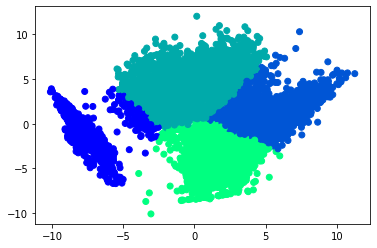

In [41]:
# Visualizing the clustering
plt.scatter(df_X_principal[0], df_X_principal[1],  
           c = kmeans.fit_predict(df_X_principal), cmap =plt.cm.winter) 
plt.show()

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packag

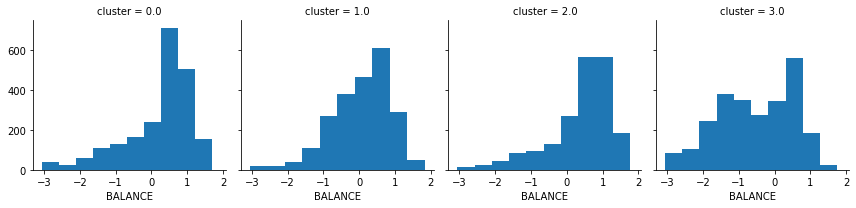

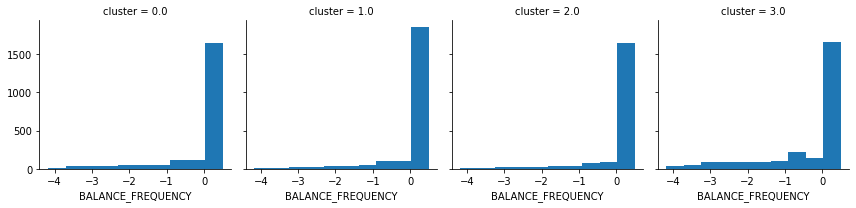

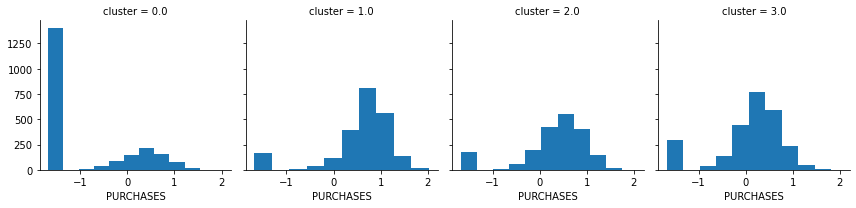

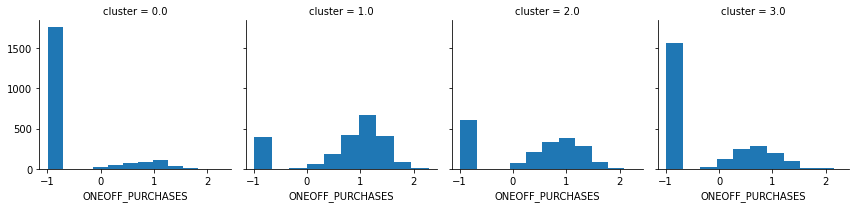

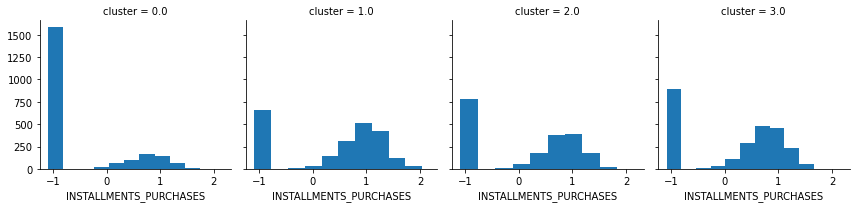

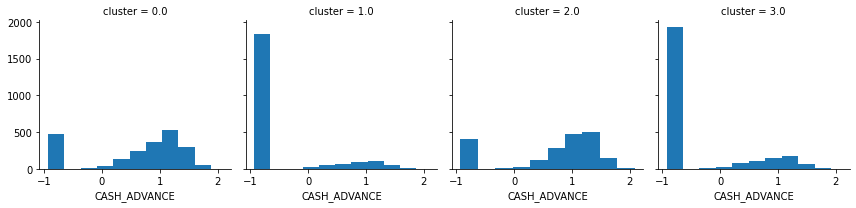

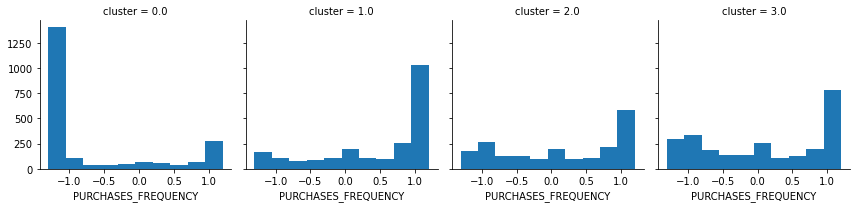

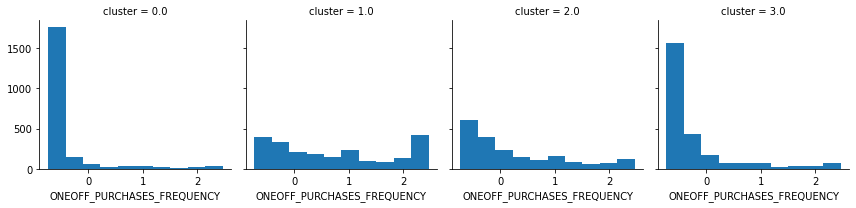

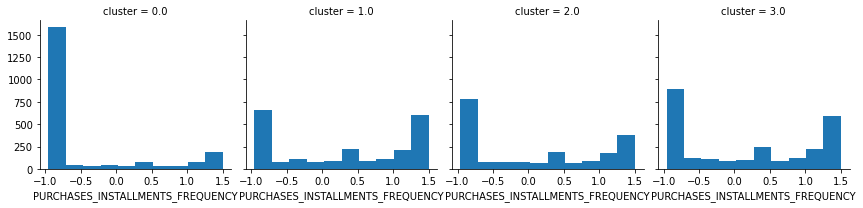

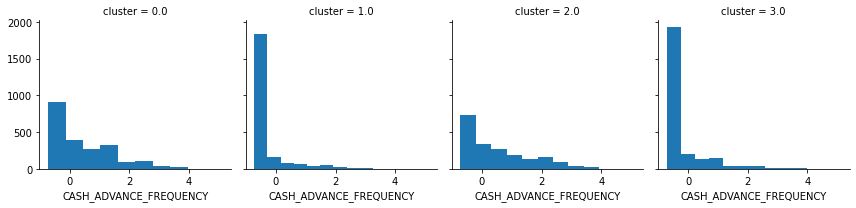

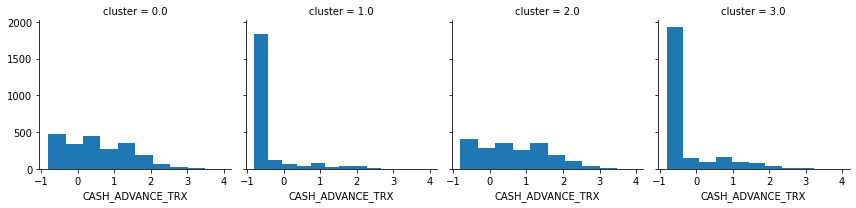

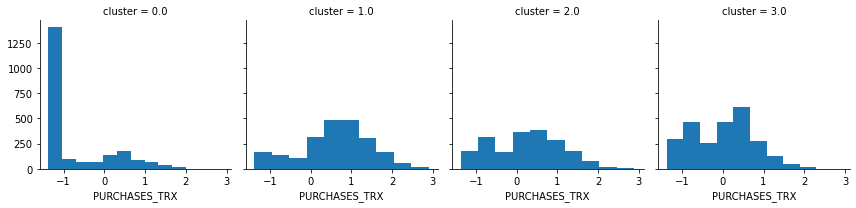

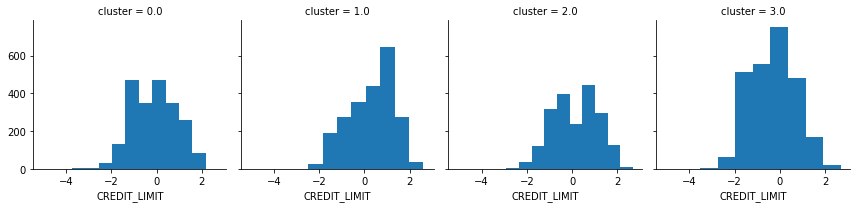

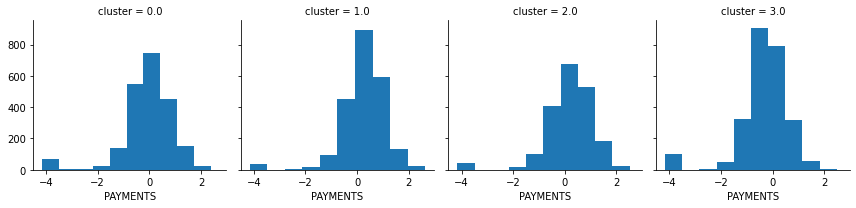

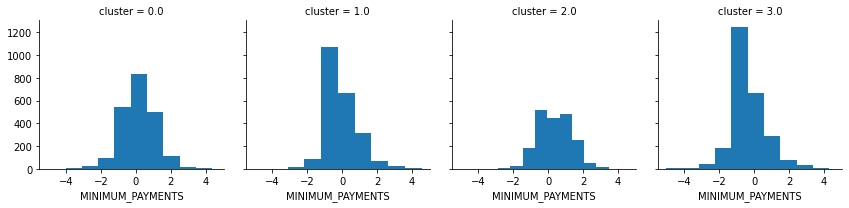

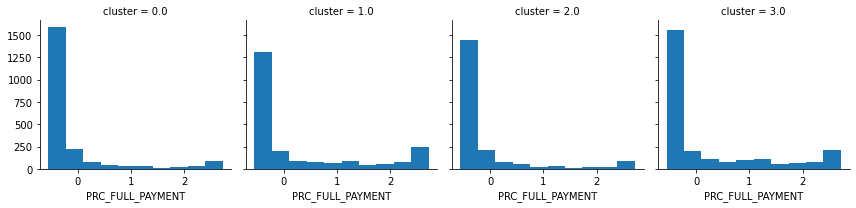

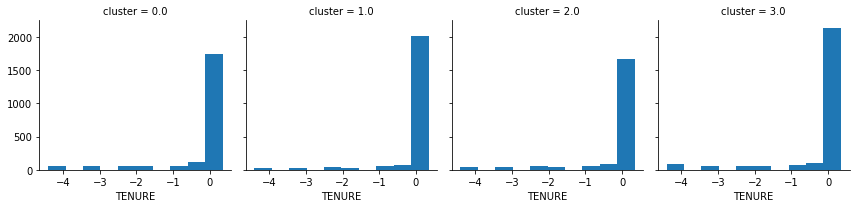

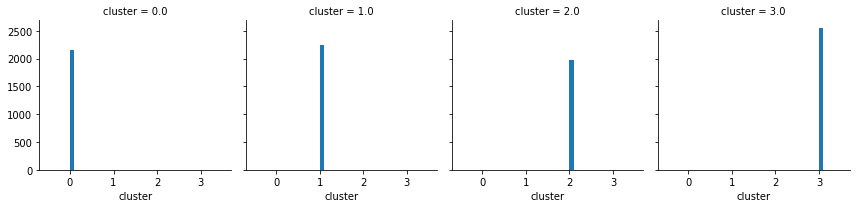

In [42]:
# Analysis of Clusters

for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

* Cluster 0:Cash Advances and Smallest Spenders - this group likes taking cash advances and don't appear to buy much
* Cluster 1:Big Spenders they make expensive purchases and have a credit limit that is between average and high.
* Cluster 2:Cash Advances with large Payments- this group takes the most cash advances and make large payments
* Cluster 3:Low Credit Limit and Small Payments

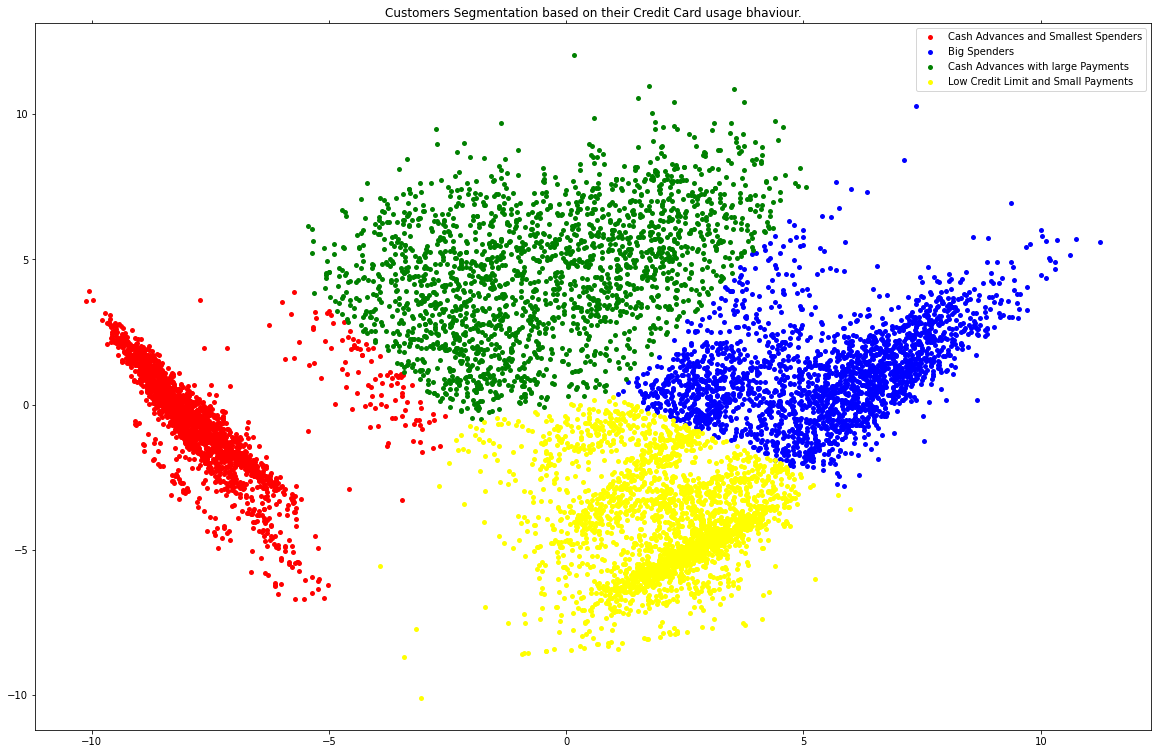

In [44]:
x, y = df_X_principal[0], df_X_principal[1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow' }

names = {0: 'Cash Advances and Smallest Spenders', 
         1: 'Big Spenders', 
         2: 'Cash Advances with large Payments', 
         3: 'Low Credit Limit and Small Payments'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()